In [55]:
import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

### Scrapping data from ncdc using pd.read_csv


In [453]:
# the provided url https://covid19.ncdc.gov.ng/ was not used as it was experiencing network downtime

ncdc= pd.read_csv(r'C:\Users\DELL\Downloads\covidnig.csv')

### John Hopkins Data Repository

In [61]:
daily_confirmed = pd.read_csv(r'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [62]:
daily_recovered = pd.read_csv(r'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [63]:
daily_death = pd.read_csv(r'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

### Saving the external data to a data frame

In [65]:
covid_ext = pd.read_csv(r'C:\Users\DELL\Downloads\covid_external.csv')

In [66]:
Budget = pd.read_csv(r'C:\Users\DELL\Downloads\Budget data.csv')

In [67]:
Real_gdp = pd.read_csv(r'C:\Users\DELL\Downloads\RealGDP.csv')

### Obtaining basic information from the dataset using head() and info()

In [69]:
ncdc.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"26,708","2,435","24,037",236
1,FCT,"9,627","2,840","6,694",93
2,Kaduna,"4,504",579,"3,877",48
3,Plateau,"4,262",280,"3,948",34
4,Oyo,"3,788",368,"3,374",46


In [70]:
ncdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.6+ KB


In [72]:
daily_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [73]:
daily_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1147 entries, Province/State to 3/9/23
dtypes: float64(2), int64(1143), object(2)
memory usage: 2.5+ MB


In [74]:
daily_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
daily_recovered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Columns: 1147 entries, Province/State to 3/9/23
dtypes: float64(2), int64(1143), object(2)
memory usage: 2.4+ MB


In [77]:
daily_death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [78]:
daily_death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1147 entries, Province/State to 3/9/23
dtypes: float64(2), int64(1143), object(2)
memory usage: 2.5+ MB


In [79]:
covid_ext.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


In [292]:
covid_ext.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   37 non-null     object 
 1   region                   37 non-null     object 
 2   Population               37 non-null     int64  
 3   Overall CCVI Index       37 non-null     float64
 4   Age                      37 non-null     float64
 5   Epidemiological          37 non-null     float64
 6   Fragility                37 non-null     float64
 7   Health System            37 non-null     float64
 8   Population Density       37 non-null     float64
 9   Socio-Economic           37 non-null     float64
 10   Transport Availability  37 non-null     float64
 11  Acute IHR                37 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 3.6+ KB


In [293]:
Budget.head()

,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00


In [295]:
Budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   states               37 non-null     object 
 1   Initial_budget (Bn)  37 non-null     float64
 2   Revised_budget (Bn)  37 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1020.0+ bytes


In [298]:
Real_gdp.head()

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59


In [31]:
Real_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    7 non-null      int64  
 1   Q1      7 non-null      float64
 2   Q2      7 non-null      float64
 3   Q3      7 non-null      float64
 4   Q4      7 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 412.0 bytes


### Data cleaning and preparation processes

In [93]:
nig_confirmed = daily_confirmed [(daily_confirmed['Country/Region'] == 'Nigeria')]

In [95]:
nig_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
206,NaN,Nigeria,9.082,8.6753,0,0,0,0,0,0,...,266593,266598,266598,266598,266598,266598,266598,266598,266598,266598


In [97]:
daily_confirmed[(daily_confirmed['Country/Region'] == 'Nigeria')].index

Index([206], dtype='int64')

In [99]:
nig_recovered = daily_recovered [(daily_recovered['Country/Region'] == 'Nigeria')]

In [101]:
nig_recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
191,NaN,Nigeria,9.082,8.6753,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
daily_recovered[(daily_recovered['Country/Region'] == 'Nigeria')].index

Index([191], dtype='int64')

In [105]:
nig_death = daily_death[(daily_death['Country/Region'] == 'Nigeria')]

In [107]:
nig_death

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
206,NaN,Nigeria,9.082,8.6753,0,0,0,0,0,0,...,3155,3155,3155,3155,3155,3155,3155,3155,3155,3155


In [111]:
daily_death[(daily_death['Country/Region'] == 'Nigeria')].index

Index([206], dtype='int64')

In [113]:
date = daily_confirmed.columns.values.tolist()

In [115]:
con_cases = daily_confirmed.iloc[206]

In [117]:
rec_cases = daily_recovered.iloc[191]

In [119]:
death_cases = daily_death.iloc[206]

In [121]:
values ={
    'Date': date[4:],
    'Confirmed Cases': con_cases[4:],
    'Recovered Cases': rec_cases[4:],
    'Death Cases': death_cases[4:]}


In [123]:
nig_cases = pd.DataFrame(values)

In [125]:
nig_cases.head() 

,Date,Confirmed Cases,Recovered Cases,Death Cases
1/22/20,1/22/20,0,0,0
1/23/20,1/23/20,0,0,0
1/24/20,1/24/20,0,0,0
1/25/20,1/25/20,0,0,0
1/26/20,1/26/20,0,0,0


### Converting data to appropriate data type for smooth analysis

In [45]:
ncdc.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"26,708","2,435","24,037",236
1,FCT,"9,627","2,840","6,694",93
2,Kaduna,"4,504",579,"3,877",48
3,Plateau,"4,262",280,"3,948",34
4,Oyo,"3,788",368,"3,374",46


In [128]:
ncdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.6+ KB


In [150]:
ncdc['No. of Cases (Lab Confirmed)'] = ncdc['No. of Cases (Lab Confirmed)'].replace(',','')

In [152]:
ncdc['No. of Cases (Lab Confirmed)'] = ncdc['No. of Cases (Lab Confirmed)'].astype(float)

In [198]:
ncdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   States Affected               37 non-null     object 
 1   No. of Cases (Lab Confirmed)  37 non-null     float64
 2   No. of Cases (on admission)   37 non-null     float64
 3   No. Discharged                37 non-null     float64
 4   No. of Deaths                 37 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.6+ KB


In [200]:
ncdc['No. of Cases (on admission)'] = ncdc['No. of Cases (on admission)'].replace(',','')

In [202]:
ncdc['No. of Cases (on admission)'] = ncdc['No. of Cases (on admission)'].astype(float)

In [204]:
ncdc['No. Discharged'] = ncdc['No. Discharged'].replace(',','')

In [205]:
ncdc['No. Discharged'] = ncdc['No. Discharged'].replace(',','').astype(float)

In [208]:
ncdc['No. of Deaths'] = ncdc['No. of Deaths'].replace(',','')

In [209]:
ncdc['No. of Deaths'] = ncdc['No. of Deaths'].replace(',','').astype(float)

In [210]:
nig_cases['Date'] = pd.to_datetime(nig_cases['Date'])

In [230]:
nig_cases.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1143 entries, 1/22/20 to 3/9/23
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             1143 non-null   datetime64[ns]
 1   Confirmed Cases  1143 non-null   int32         
 2   Recovered Cases  1143 non-null   int32         
 3   Death Cases      1143 non-null   int32         
dtypes: datetime64[ns](1), int32(3)
memory usage: 31.3+ KB


In [218]:
nig_cases['Confirmed Cases'] =  nig_cases['Confirmed Cases'].replace(',','')

In [220]:
nig_cases['Confirmed Cases'] =  nig_cases['Confirmed Cases'].replace(',','').astype(int)

In [222]:
nig_cases['Recovered Cases'] =  nig_cases['Recovered Cases'].replace(',','')

In [224]:
nig_cases['Recovered Cases'] =  nig_cases['Recovered Cases'].replace(',','').astype(int)

In [226]:
nig_cases['Death Cases'] =  nig_cases['Death Cases'].replace(',','')

In [228]:
nig_cases['Death Cases'] =  nig_cases['Death Cases'].replace(',','').astype(int)

### Analysis

 ### Top 10 states in terms of Confirmed Covid cases by Laboratory test

In [240]:
ncdc.head(10)

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,26708.0,2435.0,24037.0,236.0
1,FCT,9627.0,2840.0,6694.0,93.0
2,Kaduna,4504.0,579.0,3877.0,48.0
3,Plateau,4262.0,280.0,3948.0,34.0
4,Oyo,3788.0,368.0,3374.0,46.0
5,Rivers,3279.0,232.0,2987.0,60.0
6,Edo,2768.0,52.0,2603.0,113.0
7,Ogun,2382.0,174.0,2175.0,33.0
8,Kano,2032.0,198.0,1778.0,56.0
9,Delta,1843.0,57.0,1737.0,49.0


In [246]:
sort = ncdc.sort_values(by='No. of Cases (Lab Confirmed)',ascending = False)[['States Affected','No. of Cases (Lab Confirmed)']]

In [252]:
top10statesc = sort.head(10)

In [254]:
top10statesc

,States Affected,No. of Cases (Lab Confirmed)
0,Lagos,26708.0
1,FCT,9627.0
2,Kaduna,4504.0
3,Plateau,4262.0
4,Oyo,3788.0
5,Rivers,3279.0
6,Edo,2768.0
7,Ogun,2382.0
8,Kano,2032.0
9,Delta,1843.0


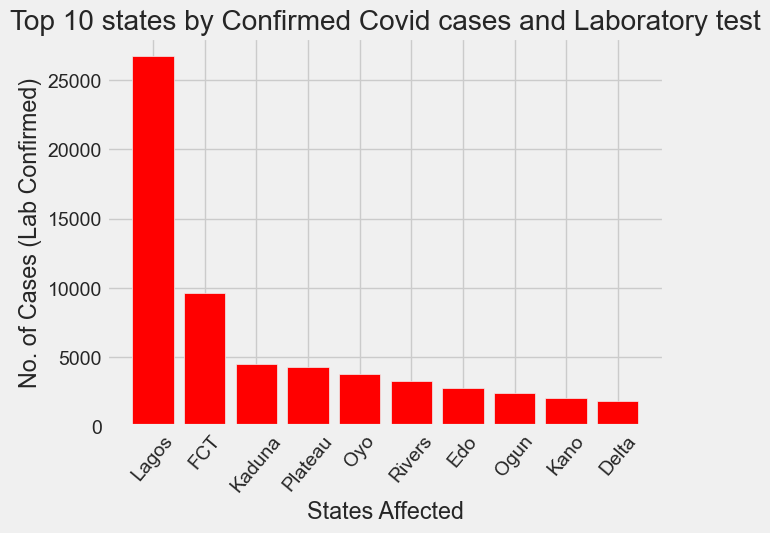

In [262]:
plt.bar('States Affected', 'No. of Cases (Lab Confirmed)', data = top10statesc, color='red')
plt.xlabel('States Affected')
plt.ylabel('No. of Cases (Lab Confirmed)')
plt.xticks(rotation=50)
plt.title('Top 10 states by Confirmed Covid cases and Laboratory test')
plt.show()

##The figure above highlights the top 10 states with covid cases with:
* Lagos state having the highest number of covid confirmed cases while
* Abuja has the second highest covid confirmed cases
* And delta state making the tenth states with highest covid cases 

In [267]:
sorts = ncdc.sort_values(by='No. Discharged',ascending = False)[['States Affected','No. Discharged']]

In [269]:
top10statesd = sorts.head(10)

In [271]:
top10statesd

,States Affected,No. Discharged
0,Lagos,24037.0
1,FCT,6694.0
3,Plateau,3948.0
2,Kaduna,3877.0
4,Oyo,3374.0
5,Rivers,2987.0
6,Edo,2603.0
7,Ogun,2175.0
8,Kano,1778.0
9,Delta,1737.0


In [273]:
top10statesc

,States Affected,No. of Cases (Lab Confirmed)
0,Lagos,26708.0
1,FCT,9627.0
2,Kaduna,4504.0
3,Plateau,4262.0
4,Oyo,3788.0
5,Rivers,3279.0
6,Edo,2768.0
7,Ogun,2382.0
8,Kano,2032.0
9,Delta,1843.0


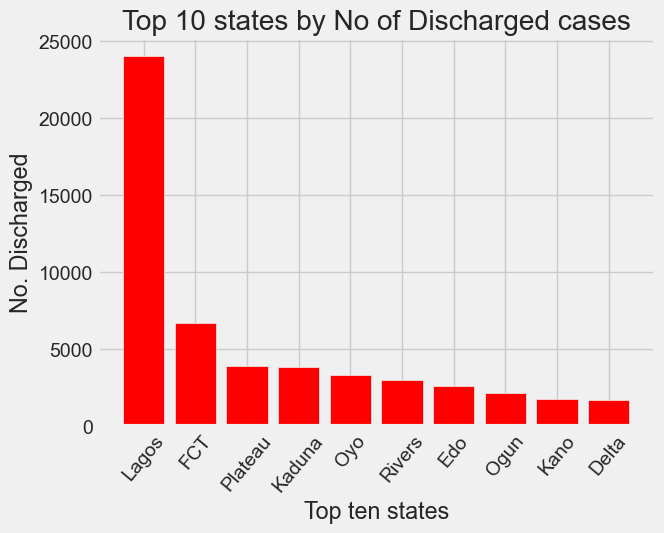

In [277]:
import matplotlib.pyplot as plt

plt.bar(top10statesd['States Affected'], top10statesd['No. Discharged'], color='red')
plt.xlabel('Top ten states')
plt.ylabel('No. Discharged')
plt.xticks(rotation=50)
plt.title('Top 10 states by No of Discharged cases')
plt.show()



In [142]:
## After data has been sorted and arranged to determine the top 10 states with discharges cases;
# Lagos state has the highest discharged rate compared to other states 

In [279]:
sorted = ncdc.sort_values(by='No. of Deaths',ascending = False)[['States Affected','No. of Deaths']]

In [281]:
top10statesdd = sorted.head(10)

In [283]:
top10statesdd

,States Affected,No. of Deaths
0,Lagos,236.0
6,Edo,113.0
1,FCT,93.0
5,Rivers,60.0
8,Kano,56.0
9,Delta,49.0
2,Kaduna,48.0
4,Oyo,46.0
10,Ondo,41.0
19,Borno,36.0


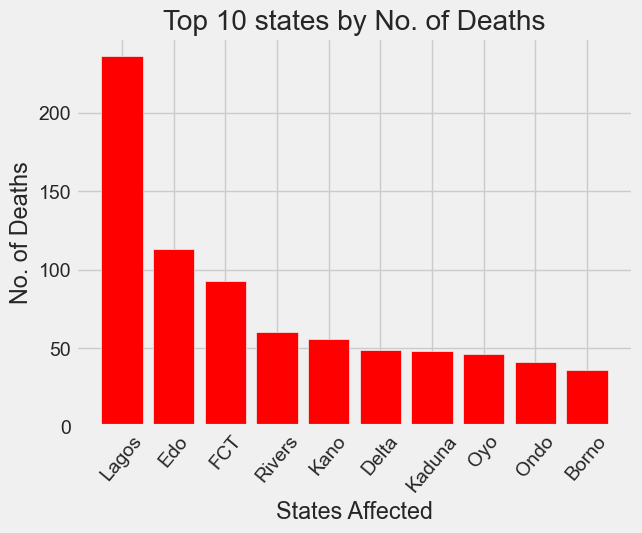

In [289]:
plt.bar('States Affected', 'No. of Deaths', data = top10statesdd, color='red')
plt.xlabel('States Affected')
plt.ylabel('No. of Deaths')
plt.xticks(rotation=50)
plt.title('Top 10 states by No. of Deaths')
plt.show()

In [291]:
## Lagos state has the highest death rate of covid confirmed cases followed by Edo state, while Borno state is the tenth state with the highest death rate

In [306]:
## Generate a line plot for the total daily confirmed, recovered and death cases in Nigeria

In [308]:
nig_conf = nig_cases.sort_values(by='Confirmed Cases')[['Date','Confirmed Cases']]

In [310]:
dailyconf = nig_conf.head()

In [312]:
dailyconf

,Date,Confirmed Cases
1/22/20,2020-01-22,0
2/12/20,2020-02-12,0
2/13/20,2020-02-13,0
2/14/20,2020-02-14,0
2/15/20,2020-02-15,0


In [314]:
nig_cases.isnull()

,Date,Confirmed Cases,Recovered Cases,Death Cases
1/22/20,False,False,False,False
1/23/20,False,False,False,False
1/24/20,False,False,False,False
1/25/20,False,False,False,False
1/26/20,False,False,False,False
...,...,...,...,...
3/5/23,False,False,False,False
3/6/23,False,False,False,False
3/7/23,False,False,False,False
3/8/23,False,False,False,False


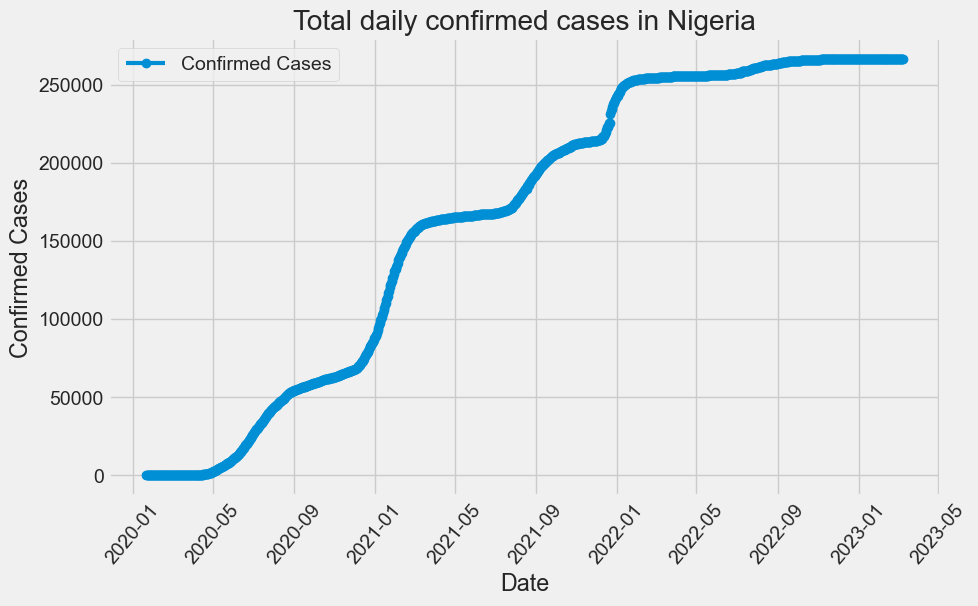

<Figure size 640x480 with 0 Axes>

In [316]:
Tconfirmed = nig_conf['Confirmed Cases'].sum()
plt.figure(figsize=(10, 6))
plt.plot(nig_conf['Date'], nig_conf['Confirmed Cases'], label='Confirmed Cases', marker='o',linestyle='solid', lw=3)

plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=50)
plt.tight_layout()
plt.legend()
plt.title('Total daily confirmed cases in Nigeria')
plt.show()
plt.savefig('daily lab confirmed cases plot.png')


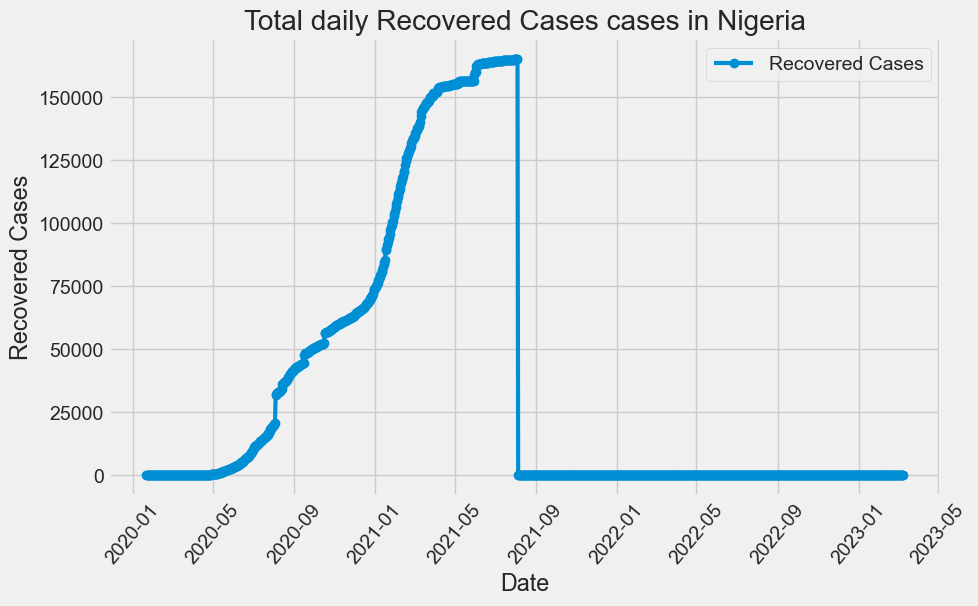

<Figure size 640x480 with 0 Axes>

In [320]:
Trecovered = nig_cases['Recovered Cases'].sum()
plt.figure(figsize=(10, 6))
plt.plot(nig_cases['Date'], nig_cases['Recovered Cases'], label='Recovered Cases', marker='o',linestyle='solid', lw=3)

plt.xlabel('Date')
plt.ylabel('Recovered Cases')
plt.xticks(rotation=50)
plt.tight_layout()
plt.legend()
plt.title('Total daily Recovered Cases cases in Nigeria')
plt.show()
plt.savefig('daily lab Recovered Cases cases plot.png')

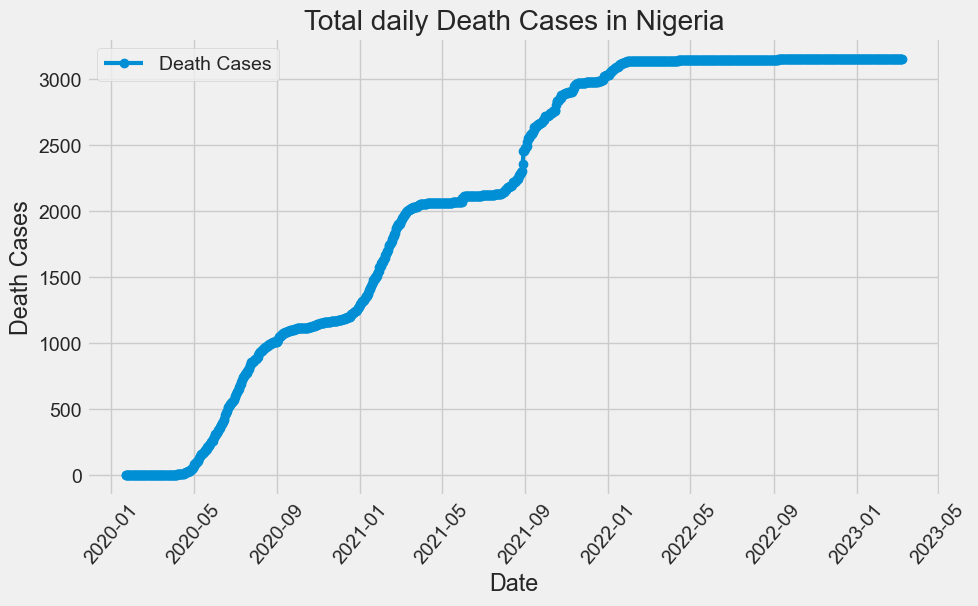

<Figure size 640x480 with 0 Axes>

In [324]:
TDeath = nig_cases['Death Cases'].sum()
plt.figure(figsize=(10, 6))
plt.plot(nig_cases['Date'], nig_cases['Death Cases'], label='Death Cases', marker='o',linestyle='solid', lw=3)

plt.xlabel('Date')
plt.ylabel('Death Cases')
plt.xticks(rotation=50)
plt.tight_layout()
plt.legend()
plt.title('Total daily Death Cases in Nigeria')
plt.show()
plt.savefig('daily lab Death cases plot.png')

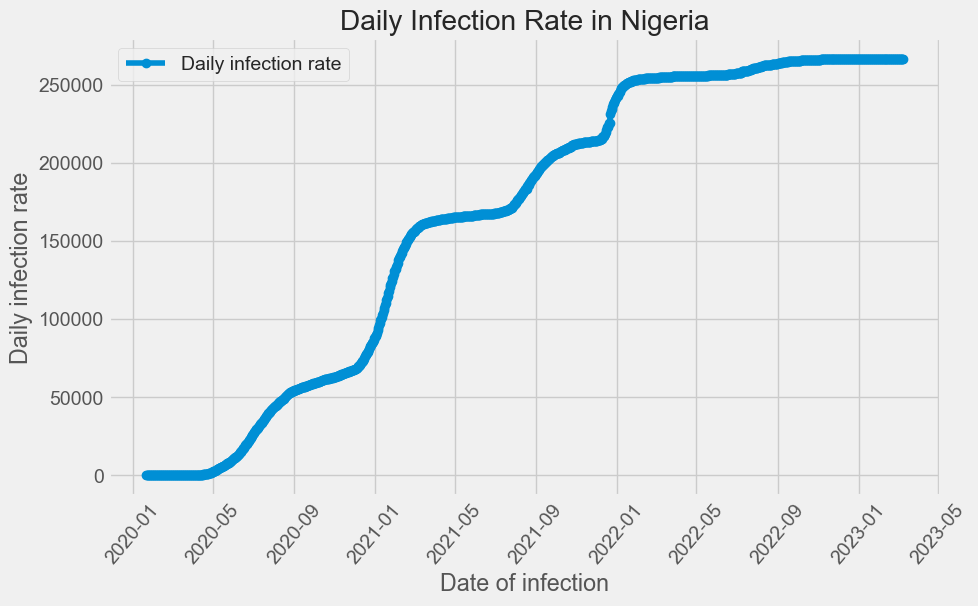

In [354]:
plt.style.use('fivethirtyeight')
nig_conf['Daily infection rate'] = nig_conf['Confirmed Cases'].diff()
plt.figure(figsize=(10, 6))
plt.plot(nig_conf['Date'], nig_conf['Confirmed Cases'], label='Daily infection rate', marker='o')

plt.xlabel('Date of infection')
plt.ylabel('Daily infection rate')
plt.xticks(rotation=50)
plt.tight_layout()
plt.legend()
plt.title('Daily Infection Rate in Nigeria')
plt.show()

In [904]:
nig_conf['Daily infection rate'].max()

6158.0

In [906]:
nig_conf.loc[nig_conf['Daily infection rate'].idxmax()]

Date                    2021-12-22 00:00:00
Confirmed Cases                      231413
Daily infection rate                 6158.0
Name: 12/22/21, dtype: object

### Relationship between external dataset and ncdc covid-19 dataset

In [368]:
ncdc.rename(columns={'States Affected':'states'	}, inplace =True)

In [370]:
sorted = ncdc.sort_values(by='No. of Cases (Lab Confirmed)', ascending = False)
top_10confirmedcases = sorted.head(10)
top_10confirmedcases

## ncdc.nlargest(10, 'No. of Cases (Lab Confirmed)',keep = 'all'). This can also be used inplace of ncdc.sort_values

ncdc.nlargest(10,columns = 'No. of Cases (Lab Confirmed)')

,states,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,26708.0,2435.0,24037.0,236.0
1,FCT,9627.0,2840.0,6694.0,93.0
2,Kaduna,4504.0,579.0,3877.0,48.0
3,Plateau,4262.0,280.0,3948.0,34.0
4,Oyo,3788.0,368.0,3374.0,46.0
5,Rivers,3279.0,232.0,2987.0,60.0
6,Edo,2768.0,52.0,2603.0,113.0
7,Ogun,2382.0,174.0,2175.0,33.0
8,Kano,2032.0,198.0,1778.0,56.0
9,Delta,1843.0,57.0,1737.0,49.0


### ncdc and covid external data were combined

In [373]:
combineddata = pd.merge(ncdc, covid_ext, how='inner', on='states')

In [375]:
top10confirmedcases = combineddata.nlargest(10,columns = 'No. of Cases (Lab Confirmed)')

In [377]:
combineddata.head(10)

,states,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,26708.0,2435.0,24037.0,236.0,South West,13992000,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,FCT,9627.0,2840.0,6694.0,93.0,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
2,Kaduna,4504.0,579.0,3877.0,48.0,North West,9227000,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86
3,Plateau,4262.0,280.0,3948.0,34.0,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
4,Oyo,3788.0,368.0,3374.0,46.0,South West,8737000,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06
5,Rivers,3279.0,232.0,2987.0,60.0,South South,7763000,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00
6,Edo,2768.0,52.0,2603.0,113.0,South South,4705000,0.1,0.9,0.8,0.1,0.1,0.5,0.4,0.3,1.09
7,Ogun,2382.0,174.0,2175.0,33.0,South West,5878000,0.3,0.6,0.7,0.5,0.6,0.6,0.0,0.2,1.07
8,Kano,2032.0,198.0,1778.0,56.0,North West,14726000,0.6,0.2,0.1,0.3,0.4,0.8,0.8,0.5,0.87
9,Delta,1843.0,57.0,1737.0,49.0,South South,6303000,0.4,0.6,0.7,0.2,1.0,0.6,0.5,0.4,1.08


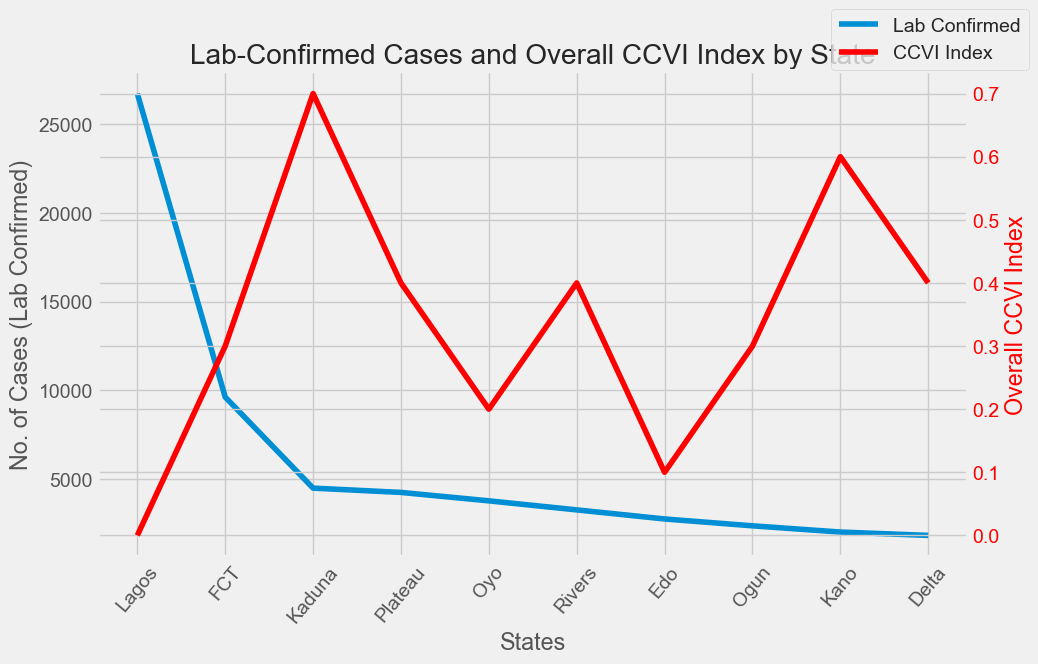

<Figure size 640x480 with 0 Axes>

In [379]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))  # Set figure size
ax1 = fig.add_subplot(111)

# Plot lab-confirmed cases
ax1.plot(top10confirmedcases['states'], top10confirmedcases['No. of Cases (Lab Confirmed)'], label='Lab Confirmed')

# Set labels and title
ax1.set_ylabel('No. of Cases (Lab Confirmed)')
ax1.set_xlabel('States')
ax1.set_title('Lab-Confirmed Cases and Overall CCVI Index by State')
plt.xticks(rotation=50)


# Create secondary axis
ax2 = ax1.twinx()
ax2.plot(top10confirmedcases['states'], top10confirmedcases['Overall CCVI Index'], 'r-', label='CCVI Index')

# Set labels and colors
ax2.set_ylabel('Overall CCVI Index', color='r')
ax2.tick_params(axis='y', labelcolor='r')
plt.xticks(rotation=50)


# Legend
fig.legend(loc='upper right')

# Show plot
plt.show()


plt.savefig('top10confirmedcases plot.png')

### Observation
* Kaduna has the highest COVID-19 Community Vulnerability Index of 0.7,
* folllowed by kano state with a ccvi of 0.6
* while lagos state has the least ccvi 


0.5590000293944836

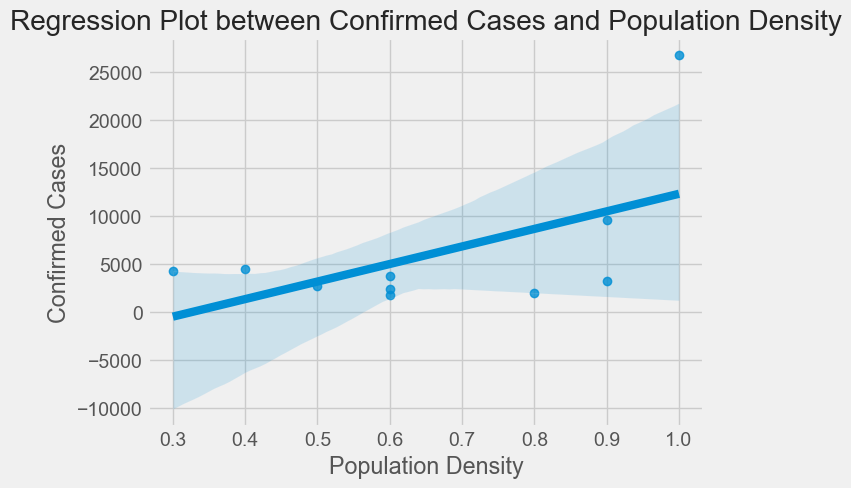

In [382]:
sns.regplot(x='Population Density', y='No. of Cases (Lab Confirmed)', data=top10confirmedcases)
plt.title('Regression Plot between Confirmed Cases and Population Density')
plt.xlabel('Population Density')
plt.ylabel('Confirmed Cases')

x=top10confirmedcases['Population Density']
y=top10confirmedcases['No. of Cases (Lab Confirmed)']
x.corr(y)


## observation
* Correlation exist between confirmed cases and population density
* correlation is 0.5590000293944836

In [385]:
combineddata.head(10)

,states,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,26708.0,2435.0,24037.0,236.0,South West,13992000,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,FCT,9627.0,2840.0,6694.0,93.0,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
2,Kaduna,4504.0,579.0,3877.0,48.0,North West,9227000,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86
3,Plateau,4262.0,280.0,3948.0,34.0,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
4,Oyo,3788.0,368.0,3374.0,46.0,South West,8737000,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06
5,Rivers,3279.0,232.0,2987.0,60.0,South South,7763000,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00
6,Edo,2768.0,52.0,2603.0,113.0,South South,4705000,0.1,0.9,0.8,0.1,0.1,0.5,0.4,0.3,1.09
7,Ogun,2382.0,174.0,2175.0,33.0,South West,5878000,0.3,0.6,0.7,0.5,0.6,0.6,0.0,0.2,1.07
8,Kano,2032.0,198.0,1778.0,56.0,North West,14726000,0.6,0.2,0.1,0.3,0.4,0.8,0.8,0.5,0.87
9,Delta,1843.0,57.0,1737.0,49.0,South South,6303000,0.4,0.6,0.7,0.2,1.0,0.6,0.5,0.4,1.08


0.9258264780306408

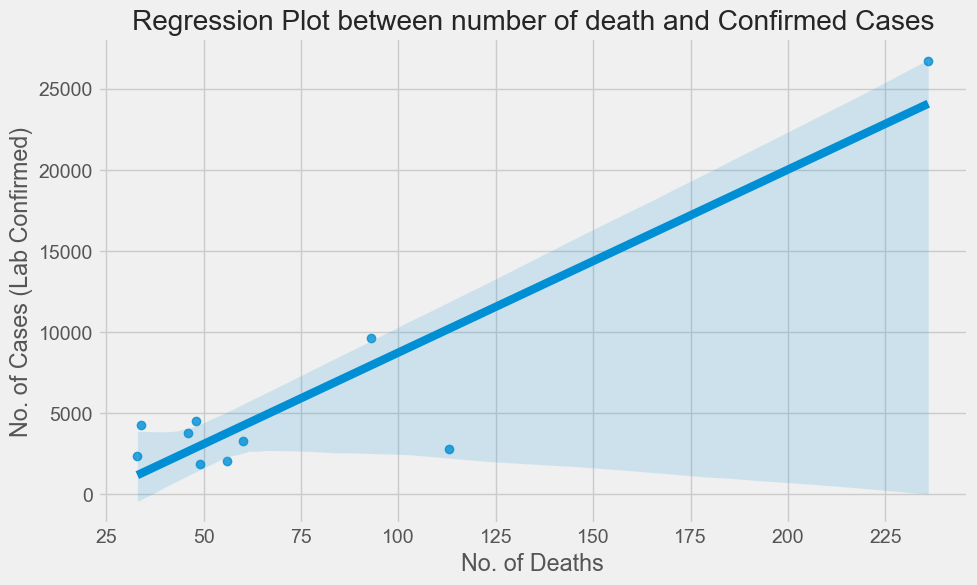

In [387]:
plt.figure(figsize=(10, 6))
sns.regplot(x='No. of Deaths', y='No. of Cases (Lab Confirmed)', data=top10confirmedcases)
plt.title('Regression Plot between number of death and Confirmed Cases')
plt.xlabel('No. of Deaths')
plt.ylabel('No. of Cases (Lab Confirmed)')

x=combineddata['No. of Deaths']
y= combineddata['No. of Cases (Lab Confirmed)']




x.corr(y)

## observation

* Here we can see that the correlation between Death cases and confirmed cases is high = 0.9258264780306408 using x.corr(y)

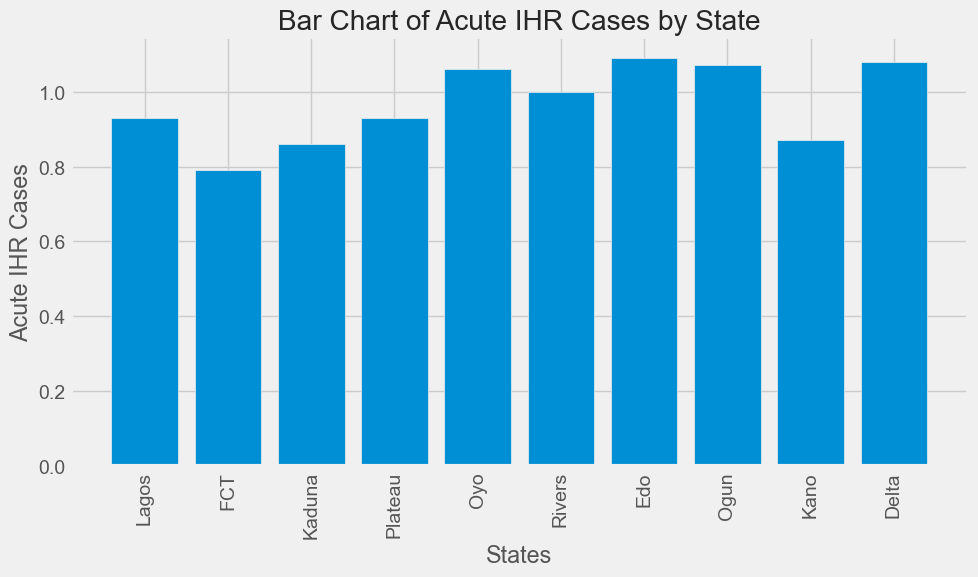

In [390]:
plt.figure(figsize=(10, 6))
plt.bar(top10confirmedcases['states'], top10confirmedcases['Acute IHR'])
plt.title('Bar Chart of Acute IHR Cases by State')
plt.xlabel('States')
plt.ylabel('Acute IHR Cases')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

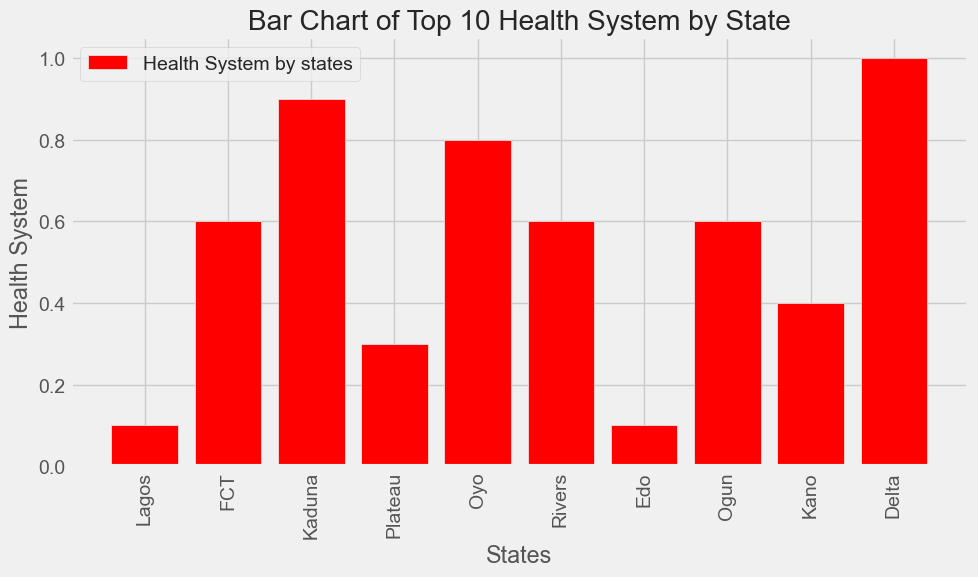

In [392]:
plt.figure(figsize=(10, 6))
plt.bar(top10confirmedcases['states'], top10confirmedcases['Health System'], color='r')
plt.title('Bar Chart of Top 10 Health System by State')
plt.xlabel('States')
plt.ylabel('Health System')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.legend(['Health System by states'])  # Specify label for the plot
plt.show()

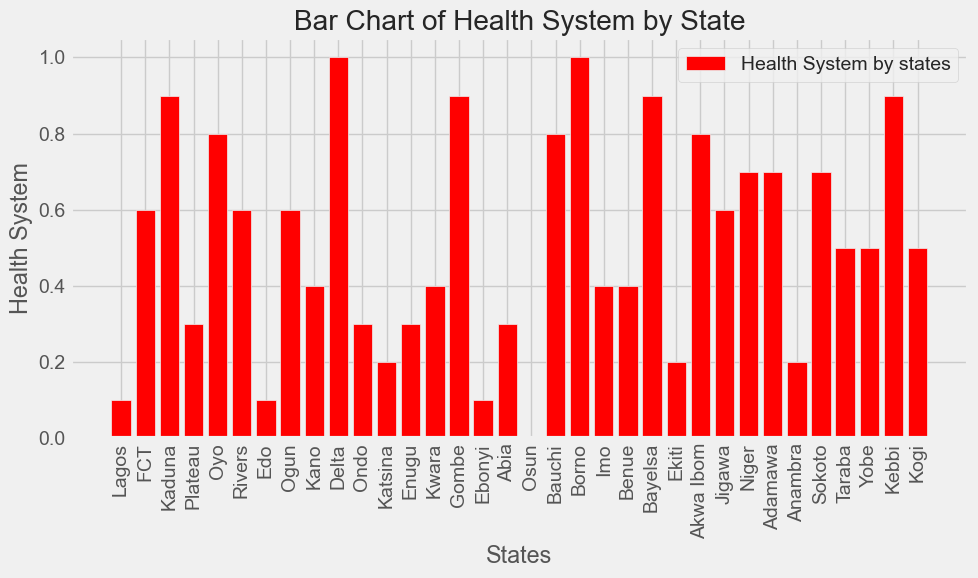

In [394]:
plt.figure(figsize=(10, 6))
plt.bar(combineddata['states'], combineddata['Health System'], color='r')
plt.title('Bar Chart of Health System by State')
plt.xlabel('States')
plt.ylabel('Health System')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.legend(['Health System by states'])  # Specify label for the plot
plt.show()

## Observation
 Access to healthcare systems, and Healthcare system performance is:
* high in lagos, Edo, and lowest in delta state and Borno state due to the high health system score
* This means that access to health system amongst covid confimed cases is higher in lagos, and lowest in Borno and Delta state

In [397]:
Real_gdp

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59
5,2019,16434552.65,16931434.89,18494114.17,19530000.00
6,2020,16740000.00,15890000.00,17820000.00,0.00


In [399]:
melted_gdp = pd.melt(Real_gdp, 
                     id_vars='Year', 
                     value_vars=['Q1', 'Q2', 'Q3', 'Q4'], 
                     var_name='Quarter', 
                     value_name='Gross Domestic Product')

melted_gdp = melted_gdp.sort_values(by=['Year', 'Quarter']).reset_index(drop=True)




In [401]:
melted_gdp.head()

,Year,Quarter,Gross Domestic Product
0,2014,Q1,15438679.50
1,2014,Q2,16084622.31
2,2014,Q3,17479127.58
3,2014,Q4,18150356.45
4,2015,Q1,16050601.38


### sorted data where year= 2020

In [404]:
melted_gdp[melted_gdp['Year']==2020]

,Year,Quarter,Gross Domestic Product
24,2020,Q1,16740000.0
25,2020,Q2,15890000.0
26,2020,Q3,17820000.0
27,2020,Q4,0.0


In [406]:
filtered_gdp = melted_gdp[(melted_gdp['Year'] == 2020) & (melted_gdp['Quarter'] == 'Q2')]

In [408]:
filtered_gdp

,Year,Quarter,Gross Domestic Product
25,2020,Q2,15890000.0


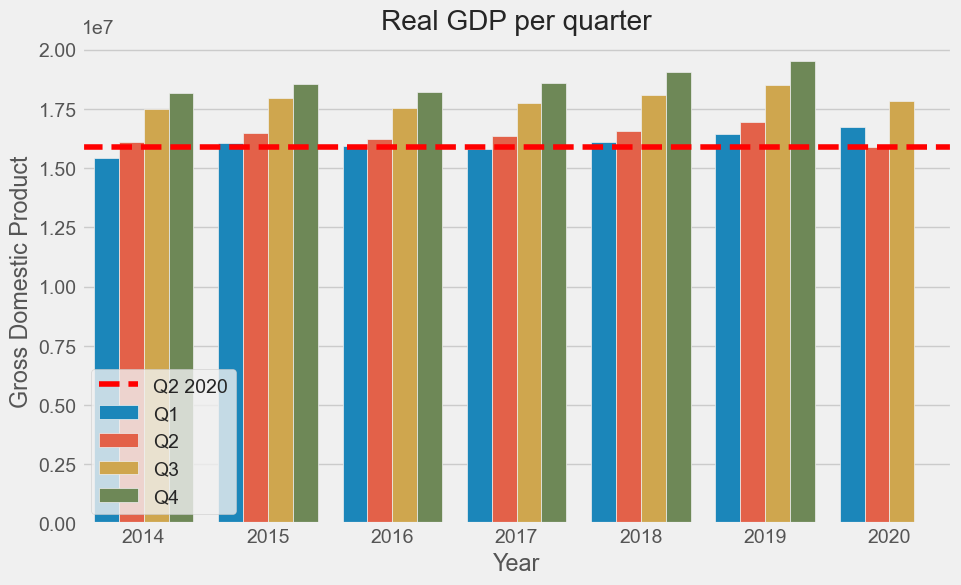

In [410]:
q2_2020_value = melted_gdp.loc[(melted_gdp['Year'] == 2020) & (melted_gdp['Quarter'] == 'Q2'), 'Gross Domestic Product'].values[0]


plt.figure(figsize=(10,6))
sns.barplot(x='Year',y='Gross Domestic Product',hue = 'Quarter',data=melted_gdp)
plt.axhline(y=q2_2020_value, linestyle='--',color = 'r', label='Q2 2020')
plt.xlabel('Year')
plt.ylabel('Gross Domestic Product')
plt.legend(loc=('lower left'))
plt.title('Real GDP per quarter')
plt.show()


# observation

* Real gdp was seen to be increasing across al quarters from 2014 till first quarter of 2020
* Due to the pandemic, a decline was observed in the second  and the third quarter of 2020 compared to others years before the pandemic

In [413]:
Budget.head()

,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00


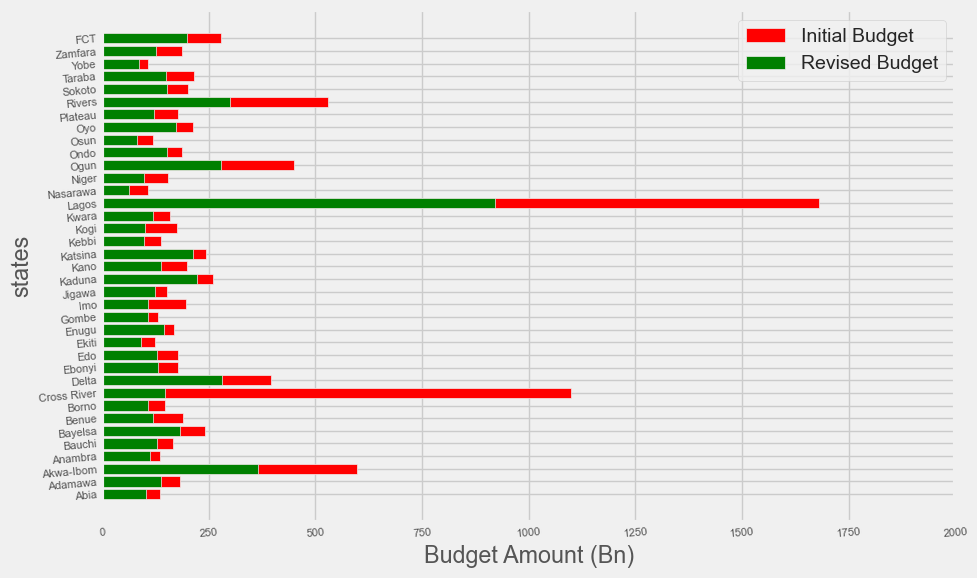

In [415]:
plt.figure(figsize=(10, 6))

plt.barh(Budget['states'], Budget['Initial_budget (Bn)'], color='r', label='Initial Budget')
plt.barh(Budget['states'], Budget['Revised_budget (Bn)'], color='g', label='Revised Budget')

plt.xlabel('Budget Amount (Bn)')
plt.ylabel('states')
plt.xticks(rotation=5, fontsize=8)
plt.yticks(rotation=5,fontsize=8)
plt.legend()
plt.xlim(0,2000)
plt.tight_layout()

plt.show()

# Observation
* Revised budget increased for most states except cross River state with a higher initial budget than the revised budget 

In [418]:
comcovid = covid_ext.nlargest(10,'Health System',keep='all').head()

In [420]:
Budcov = pd.merge(comcovid, Budget, on = 'states', how='inner')

In [422]:
Budcov.head(10)

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR,Initial_budget (Bn),Revised_budget (Bn)
0,Borno,North East,6651000,0.9,0.3,0.1,1.0,1.0,0.1,0.7,0.9,0.89,146.80,108.8
1,Delta,South South,6303000,0.4,0.6,0.7,0.2,1.0,0.6,0.5,0.4,1.08,395.50,282.3
2,Gombe,North East,3692000,1.0,0.4,0.4,0.9,0.9,0.3,0.8,0.7,0.83,130.83,107.4
3,Kaduna,North West,9227000,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86,259.25,223.6
4,Kebbi,North West,4968000,0.8,0.2,0.3,0.4,0.9,0.1,0.9,0.9,0.85,138.00,99.6


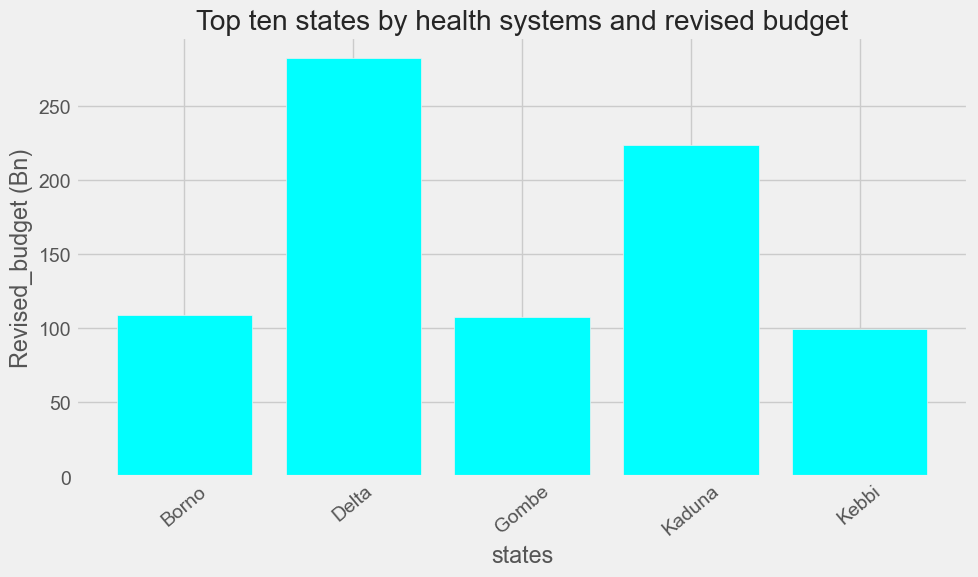

In [424]:
plt.figure(figsize=(10, 6))

plt.bar(Budcov['states'], Budcov['Revised_budget (Bn)'], color='cyan')

plt.xlabel('states')
plt.ylabel('Revised_budget (Bn)')
plt.xticks(rotation=40)
plt.title('Top ten states by health systems and revised budget')
plt.tight_layout()
plt.show()


# observation
 Top states by health systems and revised budget
 * Delta state has the highest health systems and revised budget,
 * which means that access to and performance of health system is weak, but the state has a higher revised budget,
 * followed by Borno state, having same health system value as delta state with second highest revised budged followed by Delta state.

In [427]:
q2_2020_value = melted_gdp.loc[(melted_gdp['Year'] == 2020) & (melted_gdp['Quarter'] == 'Q2'), 'Gross Domestic Product'].values[0]


In [429]:
ncdc.head()

,states,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,26708.0,2435.0,24037.0,236.0
1,FCT,9627.0,2840.0,6694.0,93.0
2,Kaduna,4504.0,579.0,3877.0,48.0
3,Plateau,4262.0,280.0,3948.0,34.0
4,Oyo,3788.0,368.0,3374.0,46.0


In [431]:
nig_cases

,Date,Confirmed Cases,Recovered Cases,Death Cases,Daily infection rate
1/22/20,2020-01-22,0,0,0,NaN
1/23/20,2020-01-23,0,0,0,0.0
1/24/20,2020-01-24,0,0,0,0.0
1/25/20,2020-01-25,0,0,0,0.0
1/26/20,2020-01-26,0,0,0,0.0
...,...,...,...,...,...
3/5/23,2023-03-05,266598,0,3155,0.0
3/6/23,2023-03-06,266598,0,3155,0.0
3/7/23,2023-03-07,266598,0,3155,0.0
3/8/23,2023-03-08,266598,0,3155,0.0


In [433]:
nig_cases[nig_cases['Date'].dt.year == 2020]

,Date,Confirmed Cases,Recovered Cases,Death Cases,Daily infection rate
1/22/20,2020-01-22,0,0,0,NaN
1/23/20,2020-01-23,0,0,0,0.0
1/24/20,2020-01-24,0,0,0,0.0
1/25/20,2020-01-25,0,0,0,0.0
1/26/20,2020-01-26,0,0,0,0.0
...,...,...,...,...,...
12/27/20,2020-12-27,84414,71034,1254,838.0
12/28/20,2020-12-28,84811,71357,1264,397.0
12/29/20,2020-12-29,85560,71937,1267,749.0
12/30/20,2020-12-30,86576,73322,1278,1016.0


In [435]:
df = nig_cases[nig_cases['Date'].dt.year == 2020]

In [437]:
df

,Date,Confirmed Cases,Recovered Cases,Death Cases,Daily infection rate
1/22/20,2020-01-22,0,0,0,NaN
1/23/20,2020-01-23,0,0,0,0.0
1/24/20,2020-01-24,0,0,0,0.0
1/25/20,2020-01-25,0,0,0,0.0
1/26/20,2020-01-26,0,0,0,0.0
...,...,...,...,...,...
12/27/20,2020-12-27,84414,71034,1254,838.0
12/28/20,2020-12-28,84811,71357,1264,397.0
12/29/20,2020-12-29,85560,71937,1267,749.0
12/30/20,2020-12-30,86576,73322,1278,1016.0


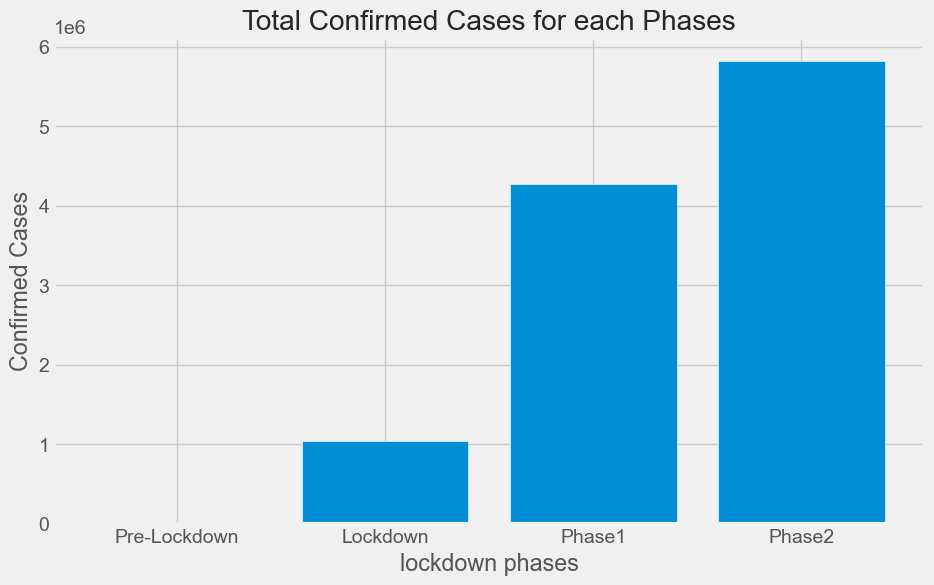

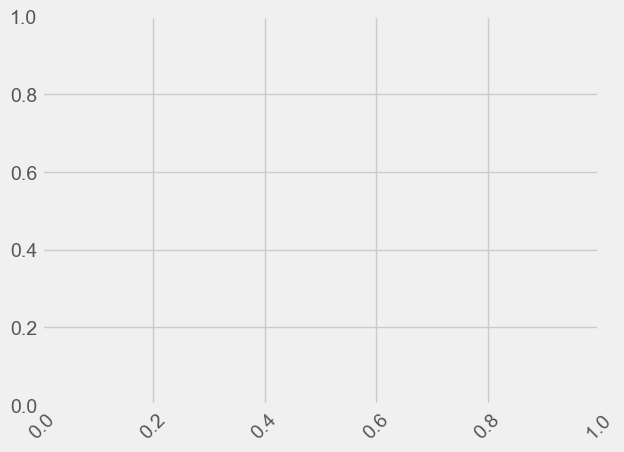

In [901]:

  # Define date ranges
values = [
    ('2020-01-22', '2020-03-10'),
    ('2020-03-11', '2020-07-04'),
    ('2020-07-05', '2020-12-30'),
]

# Convert date ranges to datetime
pd.date_range(start='2020-01-22', end='2020-12-30')
values = [
    ('2020-01-22', '2020-03-10'),
    ('2020-03-11', '2020-07-04'),
    ('2020-07-05', '2020-12-30'),
]

# Create bins and labels
Bins= pd.date_range(start='2020-01-22', end='2020-12-31', periods=5)
labels = ['Pre-Lockdown', 'Lockdown', 'Phase1','Phase2']

# Assign lockdown phases
nig_cases['phases'] = pd.cut(nig_cases['Date'], bins = Bins, labels = labels, right = False)

# Calculate total confirmed cases for each phase
dff= nig_cases.groupby('phases')['Confirmed Cases'].sum().reset_index()

# Plotting
plt.figure(figsize=(10,6))
plt.bar(dff['phases'], dff['Confirmed Cases'])
plt.xlabel('lockdown phases')
plt.ylabel('Confirmed Cases')
plt.title('Total Confirmed Cases for each Phases')
plt.show()
plt.xticks(rotation=45)
plt.show()

# observation
* Confirmed cases increased from the lockdown phase down to phase 2-lockdown phase

In [831]:
dff.head()

,phases,Confirmed Cases
0,Pre-Lockdown,5426
1,Lockdown,1038404
2,Phase1,4277283
3,Phase2,5823391


In [833]:
values = [
    ('2020-01-22', '2020-03-10'),
    ('2020-03-11', '2020-07-04'),
    ('2020-07-05', '2020-12-30'),
]

In [835]:
pd.date_range(start='2020-01-22', end='2020-12-30')
values = [
    ('2020-01-22', '2020-03-10'),
    ('2020-03-11', '2020-07-04'),
    ('2020-07-05', '2020-12-30'),
]

In [861]:
Bins= pd.date_range(start='2020-01-22', end='2020-12-30', periods=5)
labels = ['Pre-Lockdown', 'Lockdown', 'Phase1','Phase2']

In [891]:
nig_cases['phases'] = pd.cut(nig_cases['Date'], bins = Bins, labels = labels,right = False)

In [893]:
dfD= nig_cases.groupby('phases')['Death Cases'].sum().reset_index()

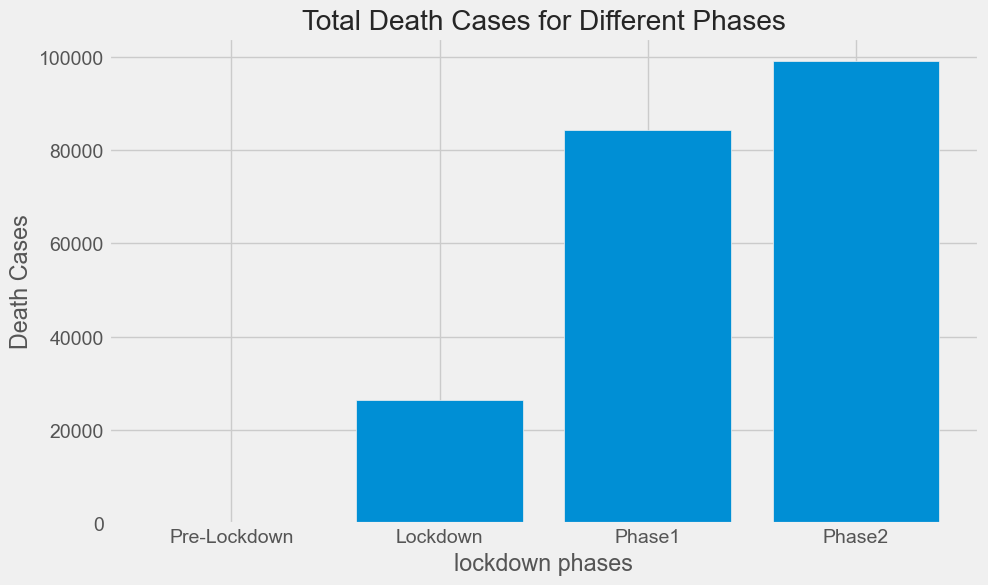

In [895]:
plt.figure(figsize=(10,6))
plt.bar(dfD['phases'], dfD['Death Cases'])
plt.xlabel('lockdown phases')
plt.ylabel('Death Cases')
plt.title('Total Death Cases for Different Phases')
plt.show()

In [897]:
dfD.head()

,phases,Death Cases
0,Pre-Lockdown,125
1,Lockdown,26514
2,Phase1,84321
3,Phase2,99153


# Observation
* Death cases increased from the lockdown phase to phase 2 of the lock down phase,
* while few death cases were recorded during the pre-lockdown phase